In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stock_df = pd.read_csv('csv/Tesla.csv - Tesla.csv.csv')
stock_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
time_series = stock_df.copy()

#Timestampオブジェクトに変換
time_series['Date'] = pd.to_datetime(stock_df['Date'])

#Dateカラムをindexにして、昇順にする
time_series = time_series.set_index(['Date']).sort_index(ascending=True)

In [4]:
#表示サイズ調整
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['font.size'] = 15

# 原系列、傾向（トレンド）、季節変動（季節性）、不規則変動（残差）
def plt_seasonal_decompose(df, col_name, period):
    res = sm.tsa.seasonal_decompose(df[col_name], period=period)
    fig = res.plot()
    plt.show()

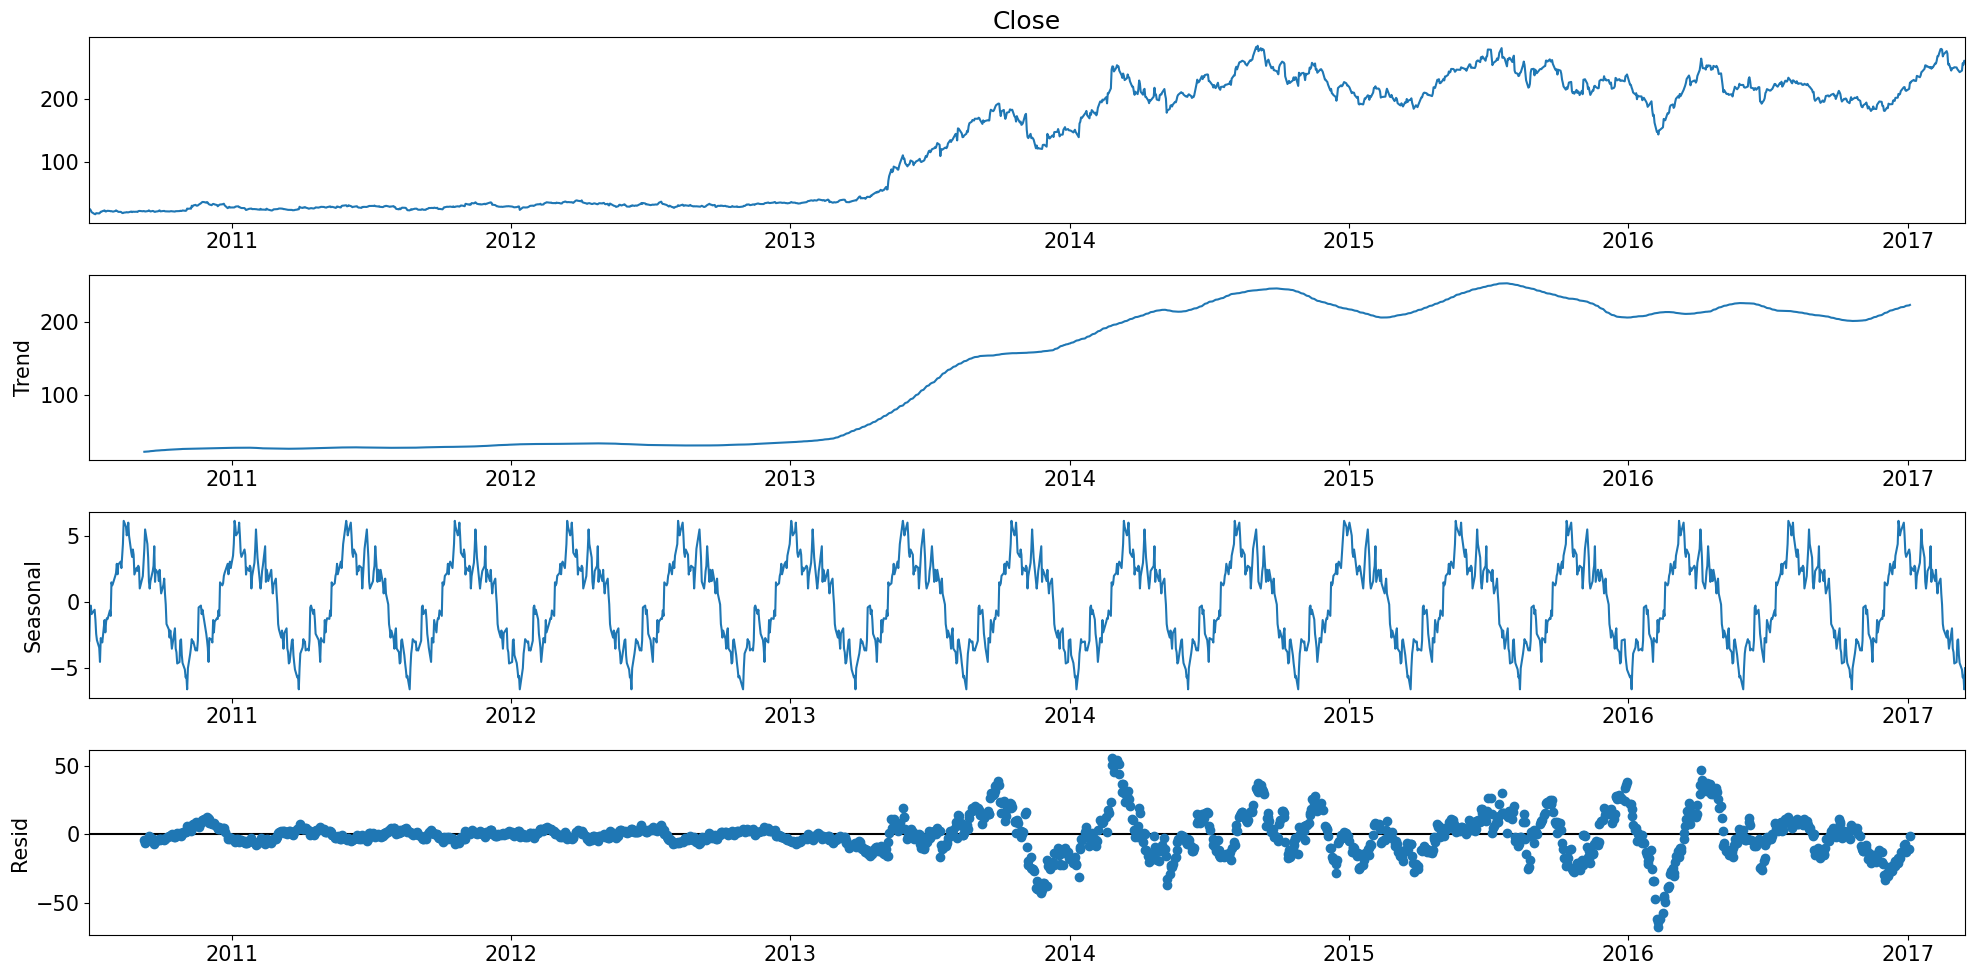

In [5]:
plt_seasonal_decompose(time_series, col_name='Close', period=100)

In [6]:
## まずは定常性の確認
print(stock_df['Close'].mean())
print(stock_df['Close'].var())

132.42865848581542
8894.977188774863


In [7]:
"""
参考ページの平均、分散はなぜかVolumeのものになっている
"""

stock_df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


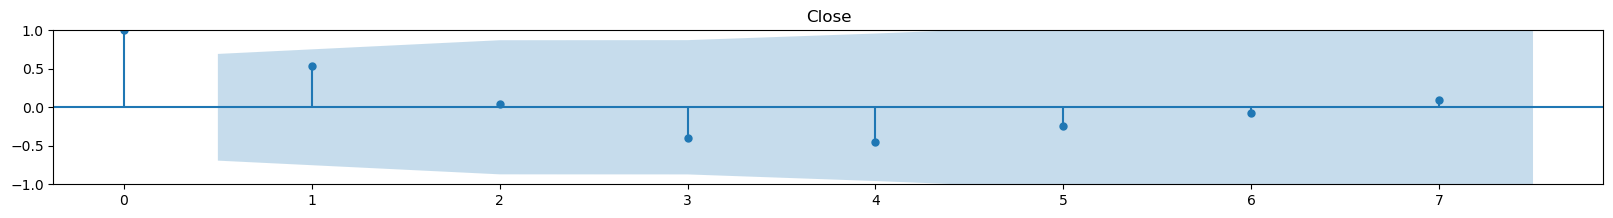

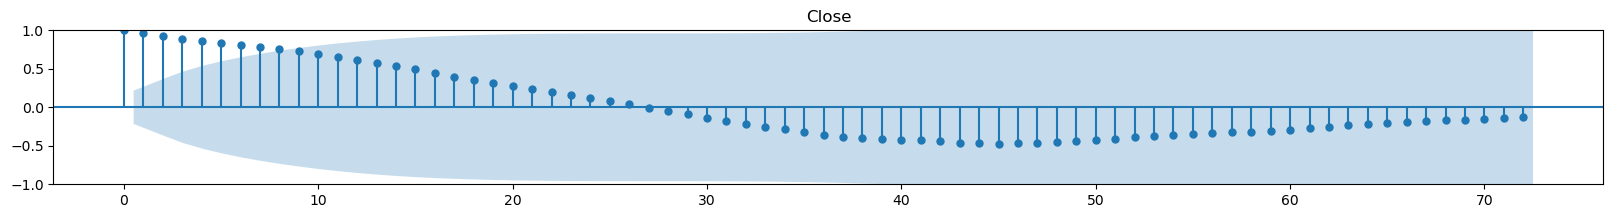

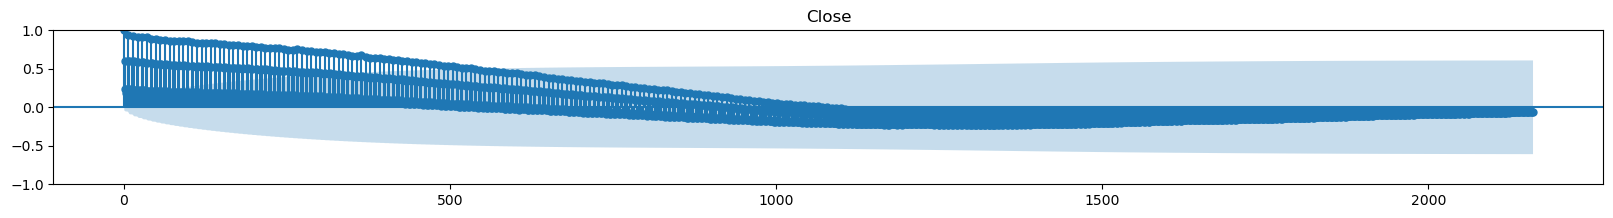

In [8]:
#コレログラム
plt.rcParams["figure.figsize"] = [20,2]
plt.rcParams["font.size"] = 10

def correlogram(cicle, lags, df, feature):
    sm.graphics.tsa.plot_acf(df.resample(cicle)[feature].sum(), title=feature, lags=lags)
    
correlogram(cicle='Y', lags='7', df=time_series, feature='Close') #年ベース
correlogram(cicle='M', lags=str(12*6), df=time_series, feature='Close') # 月ベース
correlogram(cicle='D', lags=str(30*12*6), df=time_series, feature='Close') # 日ベース

'\n参照ページでは各データ点ととの前後の指定した範囲のデータ点の平均となっているが、\nrolling()は各データ点とその直前の指定した範囲のデータ点の平均を返す\n\n\n（疑問）\nrollingの引数はどれくらいが適切なのだろうか・・・・\n'

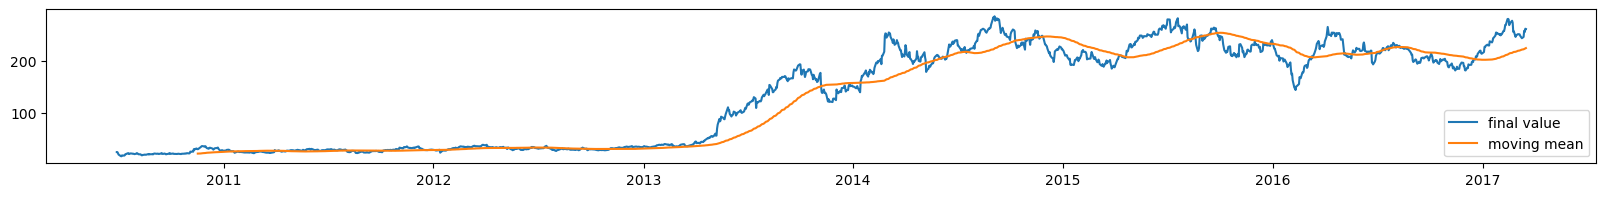

In [9]:
#移動平均
time_series['Close_move_mean'] = time_series['Close'].rolling(100).mean().round(1)
plt.plot(time_series['Close'], label='final value')
plt.plot(time_series['Close_move_mean'], label='moving mean')
plt.legend(loc='lower right')

"""
参照ページでは各データ点ととの前後の指定した範囲のデータ点の平均となっているが、
rolling()は各データ点とその直前の指定した範囲のデータ点の平均を返す


（疑問）
rollingの引数はどれくらいが適切なのだろうか・・・・
"""


In [19]:
#定常性の確認 ADF検定

test_data = time_series['Close']
adf_df = pd.DataFrame([sm.tsa.stattools.adfuller(test_data)[1]],columns=['p値'])
adf_df['p値'] = adf_df['p値'].round(decimals=3).astype(str)

adf_df #p=0.815より、定状性（単位根過程）

,p値
0,0.815


## 定常性変換

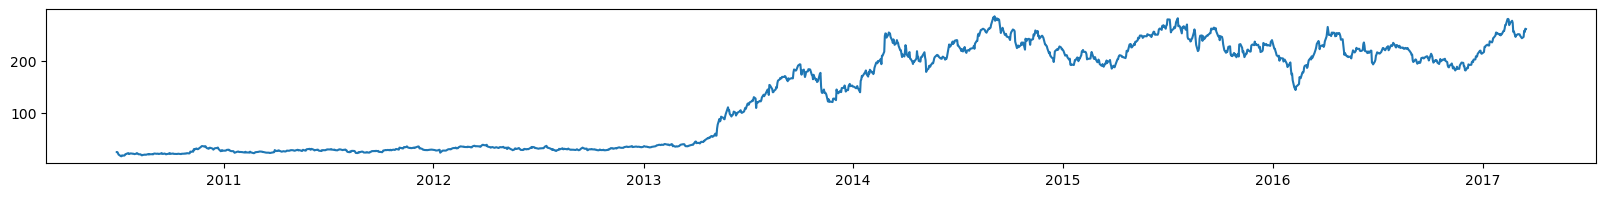

In [20]:
#原系列
plt.plot(time_series['Close'])

<AxesSubplot:xlabel='Date'>

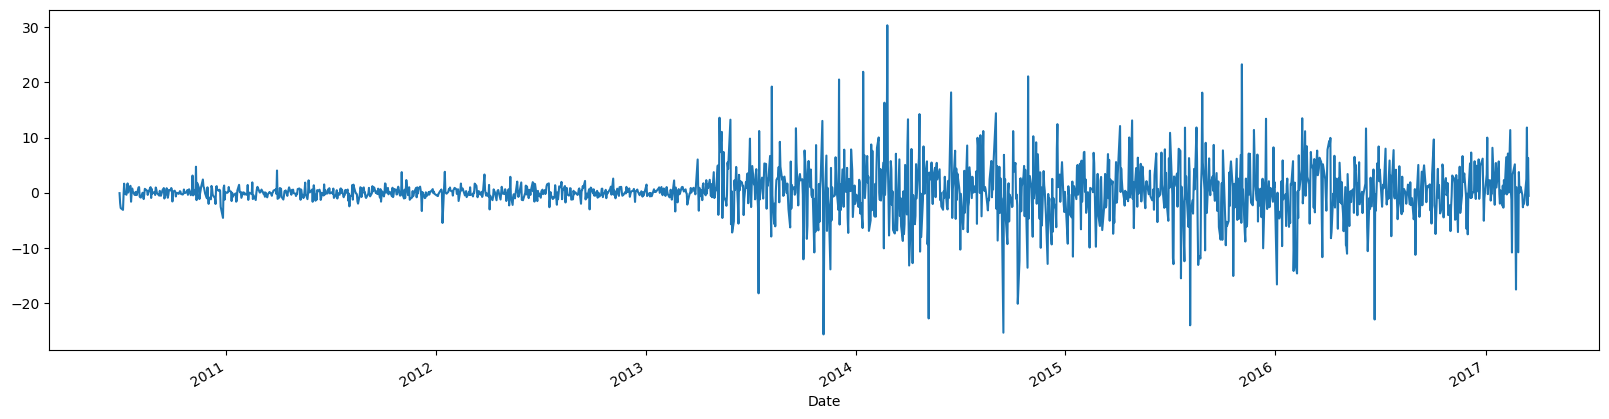

In [26]:
#差分変換後プロット
time_proc = time_series.copy()
passengers_diff_c = time_proc['Close'].diff(periods=1)
passengers_diff_c.plot(figsize=[20,5])

In [27]:
pass_mean = passengers_diff_c.mean()
pass_var = passengers_diff_c.var()

print(f'差分変換後の平均は{pass_mean}, 分散は{pass_var}')

"""
y = at + bの上昇、下降トレンドを持つ時系列データからaの定数になった？？
"""

差分変換後の平均は0.14051448905972796, 分散は19.28054472840274


<AxesSubplot:xlabel='Date'>

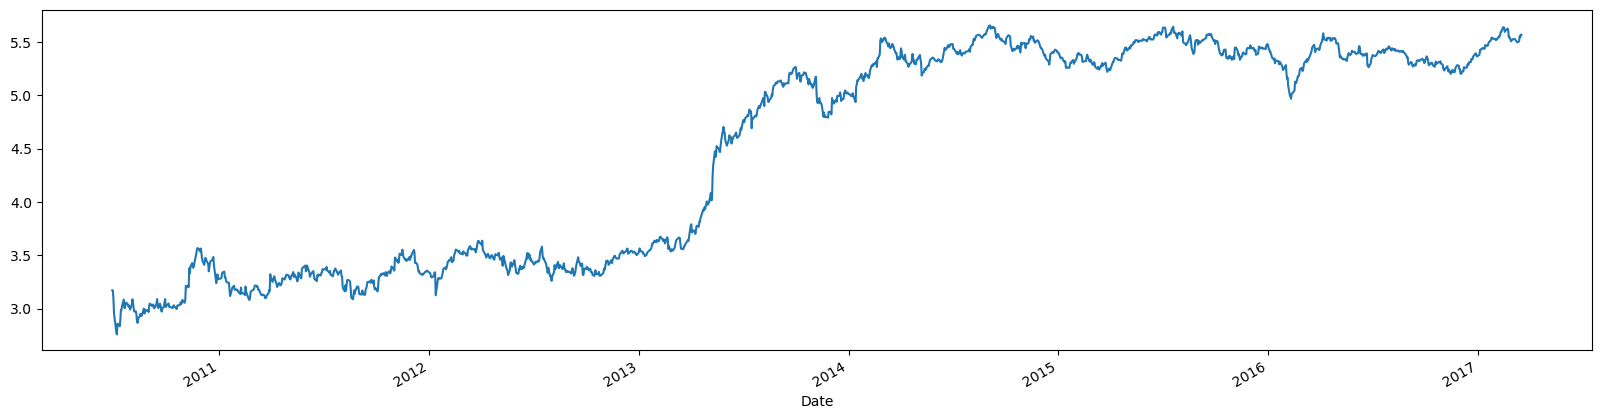

In [30]:
##対数変換
passengers_log_c = np.log(time_proc['Close'])
passengers_log_c.plot(figsize=[20,5])



In [32]:
print(passengers_log_c.mean())
print(passengers_log_c.var())

"""
分散がかなり抑えられている
"""

4.48285833956542
0.9894592908040509


<AxesSubplot:xlabel='Date'>

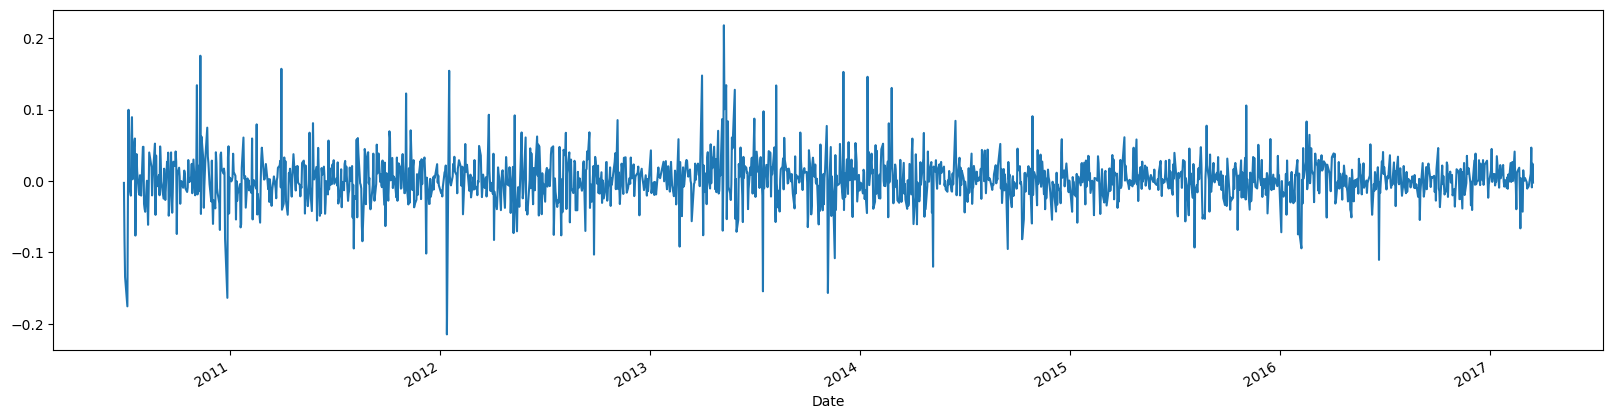

In [33]:
#対数差分変換
passengers_log_diff_c = passengers_log_c.diff(periods=1)
passengers_log_diff_c.plot(figsize=[20,5])


In [34]:
print(passengers_log_diff_c.mean())
print(passengers_log_diff_c.var())


"""
平均と分散が0に近づいていて、定常過程に近づいている
"""

0.0014151238107781069
0.0010697923770593958


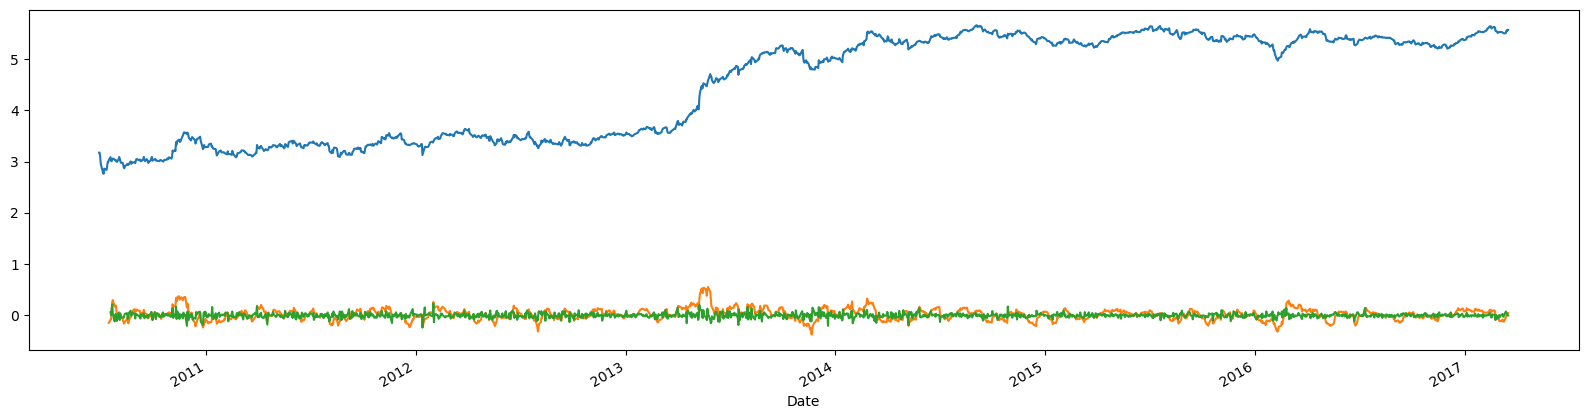

In [66]:
##ADF検定

#対数変数
passengers_log_c = np.log(time_proc['Close'])
passengers_log_c.plot(figsize=[20,5])

#季節差分変換
"""
季節とは書いてるけど、12dの差分をとっている
周期があればperiodの引数はなんでも良い？
"""
passengers_log_sdiff_c = passengers_log_c.diff(periods=12)
passengers_log_sdiff_c.plot(figsize=[20,5])


#ラグ１の差分
passengers_log_sdiff2_c = passengers_log_sdiff_c.diff()
passengers_log_sdiff2_c.plot(figsize=[20,5])

# 変換済みデータの欠損の削除
passengers_sdiff2_c2 = passengers_log_sdiff2_c.dropna()

#成分分解（季節調整）
# res = sm.tsa.seasonal_decompose(passengers_sdiff2_c2, period=100)
# fig = res.plot()
# plt.show()




In [59]:
adf_df = pd.DataFrame([sm.tsa.stattools.adfuller(passengers_sdiff2_c2)[1]],columns=['p値'])
adf_df['p値'] = adf_df['p値'].round(decimals=3).astype(str)
adf_df

,p値
0,0.0


In [64]:
#　ADF値
sm.tsa.stattools.adfuller(passengers_sdiff2_c2)[1]

6.782627445647618e-23